# Clustering con K-Medias	y PCA
Presenta: Juliho Castillo Colmenares

**¡Bienvenidos a la actividad práctica del módulo!**

*Antes de empezar*

El objetivo de esta actividad es que realices un análisis de agrupación por K-Medias a una base de datos de manera que puedas generar conclusiones de acuerdo a diversas categorías.

*Paso a paso:*

1. [Extrae en línea la base de datos “Iris.csv” de la siguiente liga y agrégala a un DataFrame en Python.](https://gist.github.com/netj/8836201)
2. Agrupa las observaciones de la tabla descargada mediante el algoritmo de K-Medias sin realizar ningún tipo de transformación de los datos originales. Para dicho efecto, determina el número óptimo de clusters tanto por el criterio del gráfico de codo así como por el indicador Silhouette.
3. Repite el ejercicio anterior después de haber transformado tus datos originales a dos columnas, mediante reducción por PCA. Gráfica los grupos obtenidos considerando las dos dimensiones resultantes.
4. Compara los resultados de los incisos 2) y 3). ¿Obtuviste los mismos resultados de agrupamiento? Comenta sobre la ventaja práctica de haber efectuado la transformación por PCA antes de aplicar el algoritmo K-Medias.

In [9]:
import pandas as pd
dataframe = pd.read_csv('data/iris.csv')
dataframe.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


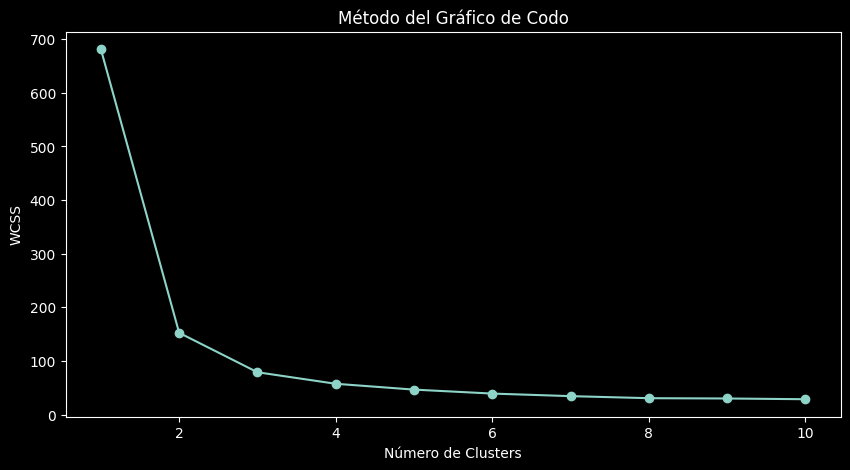

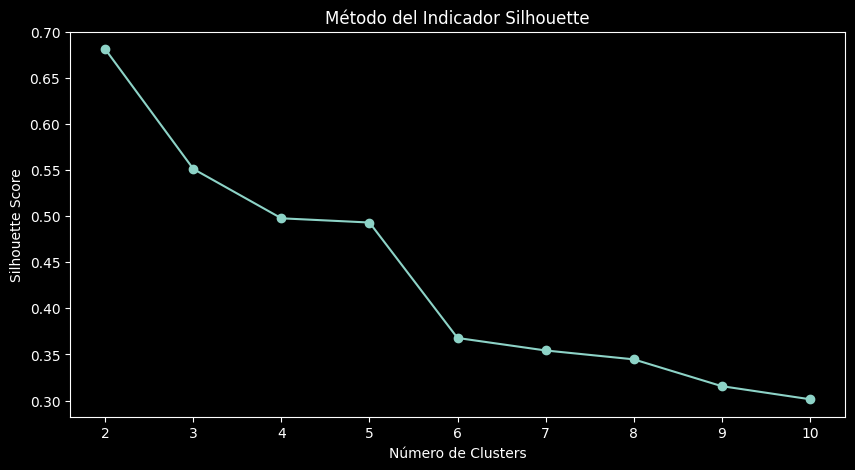

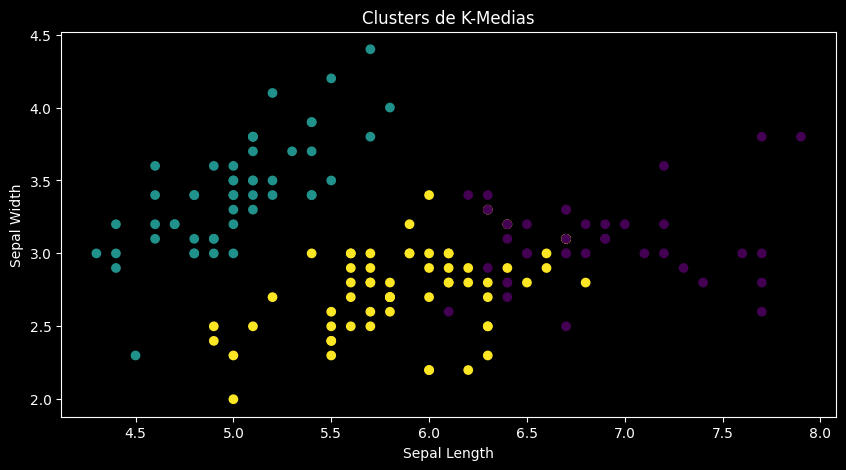

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar los datos
dataframe = pd.read_csv('data/iris.csv')

# Preparar los datos (excluir la columna 'variety')
X = dataframe.drop(columns=['variety'])

# Determinar el número óptimo de clusters utilizando el gráfico de codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Gráfico de Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Determinar el número óptimo de clusters utilizando el indicador Silhouette
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método del Indicador Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Aplicar K-Medias con el número óptimo de clusters (por ejemplo, 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(X)

# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dataframe['cluster'], cmap='viridis')
plt.title('Clusters de K-Medias')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

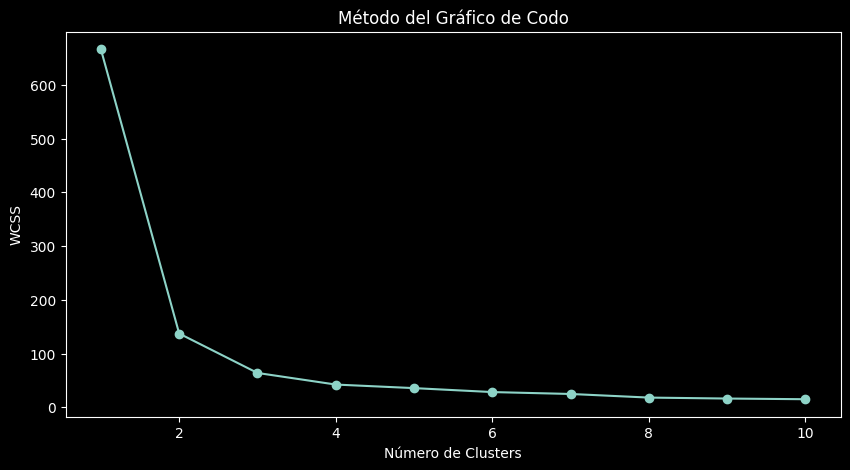

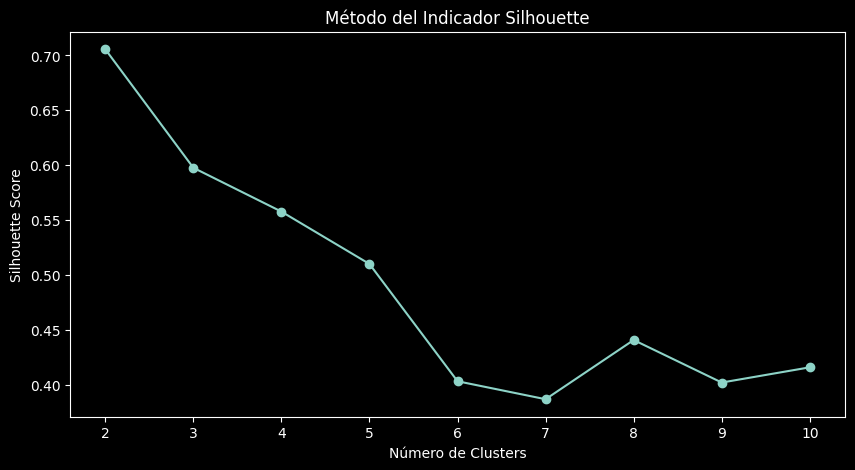

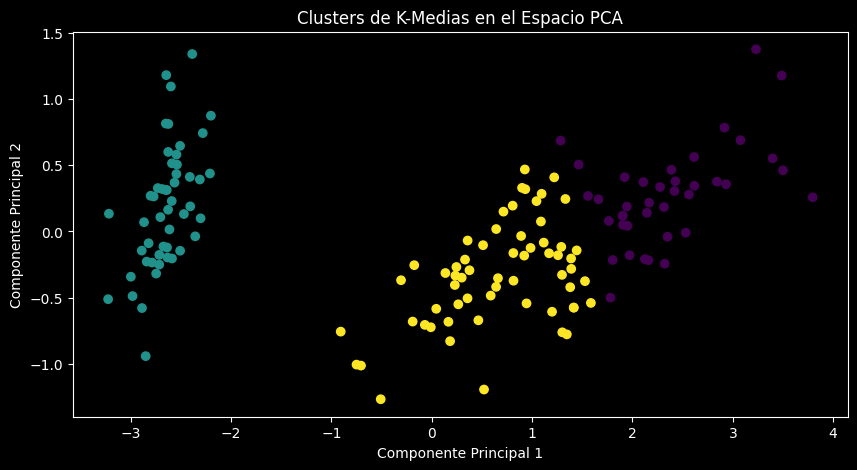

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar los datos
dataframe = pd.read_csv('data/iris.csv')

# Preparar los datos (excluir la columna 'variety')
X = dataframe.drop(columns=['variety'])

# Reducir la dimensionalidad a dos columnas utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determinar el número óptimo de clusters utilizando el gráfico de codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Gráfico de Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Determinar el número óptimo de clusters utilizando el indicador Silhouette
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método del Indicador Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Aplicar K-Medias con el número óptimo de clusters (por ejemplo, 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(X_pca)

# Visualizar los resultados en las dos dimensiones resultantes de PCA
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataframe['cluster'], cmap='viridis')
plt.title('Clusters de K-Medias en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Para comparar los resultados de los dos enfoques (sin PCA y con PCA), podemos observar los siguientes puntos:

1. **Número de Clusters Óptimos**:
   - **Sin PCA**: Determinamos el número óptimo de clusters utilizando el gráfico de codo y el indicador Silhouette directamente sobre los datos originales.
   - **Con PCA**: Determinamos el número óptimo de clusters utilizando el gráfico de codo y el indicador Silhouette sobre los datos reducidos a dos dimensiones mediante PCA.

2. **Visualización de Clusters**:
   - **Sin PCA**: Visualizamos los clusters en el espacio original de las primeras dos características (por ejemplo, `Sepal Length` y `Sepal Width`).
   - **Con PCA**: Visualizamos los clusters en el espacio reducido de dos dimensiones resultantes de PCA ([`Componente Principal 1`](command:_github.copilot.openSymbolFromReferences?%5B%22Componente%20Principal%201%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS29%20K-Means%5C%5Ckmeans.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS29%2520K-Means%2Fkmeans.ipynb%23W5sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS29%20K-Means%2Fkmeans.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22W5sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A18%2C%22character%22%3A15%7D%7D%5D%5D "Go to definition") y [`Componente Principal 2`](command:_github.copilot.openSymbolFromReferences?%5B%22Componente%20Principal%202%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS29%20K-Means%5C%5Ckmeans.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS29%2520K-Means%2Fkmeans.ipynb%23W5sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS29%20K-Means%2Fkmeans.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22W5sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A13%2C%22character%22%3A23%7D%7D%5D%5D "Go to definition")).

### Comparación de Resultados
- **Clusters Óptimos**: Es posible que el número óptimo de clusters determinado por ambos métodos sea el mismo, pero esto no siempre es garantizado. La reducción de dimensionalidad puede afectar la estructura de los datos y, por lo tanto, la determinación del número óptimo de clusters.
- **Agrupamiento**: Los clusters obtenidos pueden diferir ligeramente debido a la transformación de los datos. PCA puede cambiar la distribución de los datos en el espacio, lo que puede llevar a una agrupación diferente.

### Ventaja Práctica de PCA
- **Reducción de Dimensionalidad**: PCA reduce la dimensionalidad de los datos, lo que puede simplificar el problema de clustering y hacer que el algoritmo de K-Medias sea más eficiente y rápido.
- **Eliminación de Redundancia**: PCA elimina la redundancia en los datos al combinar características correlacionadas, lo que puede mejorar la calidad del clustering.
- **Visualización**: Reducir los datos a dos dimensiones facilita la visualización de los clusters, lo que es útil para interpretar y comunicar los resultados.

### Comentarios
La transformación por PCA antes de aplicar el algoritmo K-Medias puede ser ventajosa en términos de eficiencia y simplicidad. Sin embargo, es importante considerar que la reducción de dimensionalidad puede alterar la estructura de los datos y, por lo tanto, los resultados del clustering. Es recomendable comparar ambos enfoques y elegir el que mejor se adapte a las necesidades específicas del análisis.

### Código para Comparar Resultados
Podemos agregar un código para comparar los resultados de ambos enfoques visualmente:



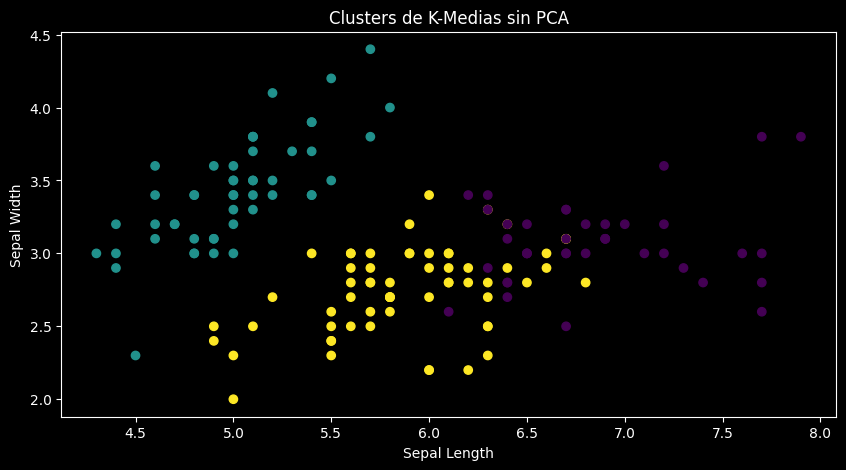

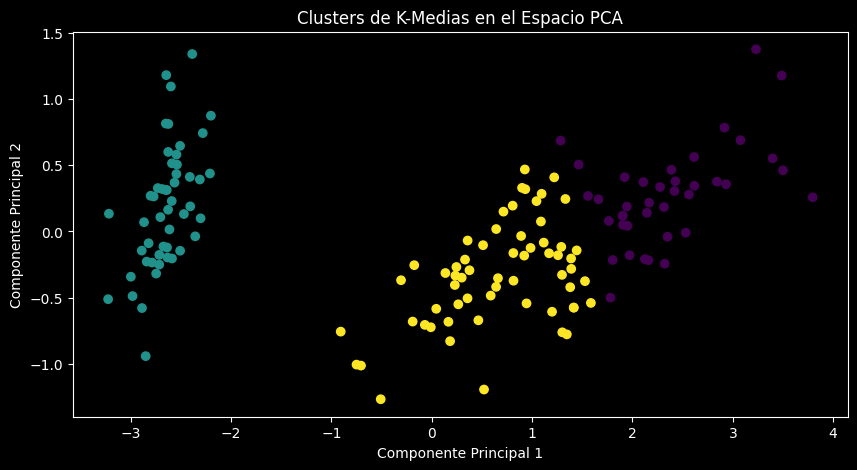

In [12]:
# Visualizar los resultados sin PCA
plt.figure(figsize=(10, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dataframe['cluster'], cmap='viridis')
plt.title('Clusters de K-Medias sin PCA')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Visualizar los resultados con PCA
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataframe['cluster'], cmap='viridis')
plt.title('Clusters de K-Medias en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()



Este código permite visualizar y comparar los resultados de los clusters obtenidos sin PCA y con PCA.